https://archive.ics.uci.edu/datasets?search=dry+bean


In [1]:
!pip install squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
import plotly.express as px
from pandas.plotting import parallel_coordinates, andrews_curves, radviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler, RobustScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize

Loading the dataset and checking its structure, column types, and non-null values for initial understanding.


In [2]:
df = pd.read_excel("/content/Dry_Bean_Dataset.xlsx")
print("Shape Of The Dataset Is:",df.shape)
df.info()

FileNotFoundError: [Errno 2] No such file or directory: '/content/Dry_Bean_Dataset.xlsx'

Displaying the first few rows of the dataset for previewing data entries and verifying correct loading.


In [36]:
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


Checking the Null values in the dataset and Creating a summary table showing each column’s unique value count and corresponding data type.


In [37]:
total_nulls = df.isnull().sum().sum()

if total_nulls > 0:
    print(f"Total null values count: {total_nulls}")
else:
    print("Total null values count: 0")

unique_summary = pd.DataFrame({
    'Column': df.columns,
    'Unique_Count': df.nunique().values,
    'Data_Type': df.dtypes.values
})
print(unique_summary)

Total null values count: 0
             Column  Unique_Count Data_Type
0              Area         12011     int64
1         Perimeter         13416   float64
2   MajorAxisLength         13543   float64
3   MinorAxisLength         13543   float64
4      AspectRation         13543   float64
5      Eccentricity         13543   float64
6        ConvexArea         12066     int64
7     EquivDiameter         12011   float64
8            Extent         13535   float64
9          Solidity         13526   float64
10        roundness         13543   float64
11      Compactness         13543   float64
12     ShapeFactor1         13543   float64
13     ShapeFactor2         13543   float64
14     ShapeFactor3         13543   float64
15     ShapeFactor4         13543   float64
16            Class             7    object


Checking and displaying duplicate rows in the dataset for ensuring data uniqueness and consistency.


In [38]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    dup_indices = df[df.duplicated()].index[:5]
    print("\nDisplaying first 10 duplicate pairs:\n")
    rows_to_display = []
    for idx in dup_indices:
        rows_to_display.append(df.loc[idx - 1])
        rows_to_display.append(df.loc[idx])
    duplicate_pairs_df = pd.DataFrame(rows_to_display)
    display(duplicate_pairs_df)
else:
    print("No duplicate rows found in the dataset.")

Number of duplicate rows: 68

Displaying first 10 duplicate pairs:



,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
5504,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5505,33518,702.956,277.571399,154.305581,1.798842,0.831240,34023,206.582775,0.808383,0.985157,0.852377,0.744251,0.008281,0.001567,0.553909,0.996396,HOROZ
5508,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5509,33954,716.750,277.368480,156.356326,1.773951,0.825970,34420,207.922042,0.799482,0.986461,0.830549,0.749624,0.008169,0.001591,0.561936,0.996847,HOROZ
5547,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
5548,38427,756.323,306.533886,160.591784,1.908777,0.851782,38773,221.193978,0.796976,0.991076,0.844174,0.721597,0.007977,0.001334,0.520702,0.993905,HOROZ
5553,38891,791.343,319.499996,156.869619,2.036723,0.871168,39651,222.525412,0.650025,0.980833,0.780422,0.696480,0.008215,0.001192,0.485085,0.987983,HOROZ
5554,38891,791.343,319.499996,156.869619,2.036723,0.871168,39651,222.525412,0.650025,0.980833,0.780422,0.696480,0.008215,0.001192,0.485085,0.987983,HOROZ
5598,40804,790.802,323.475648,163.287717,1.981016,0.863241,41636,227.932592,0.787570,0.980017,0.819931,0.704636,0.007928,0.001206,0.496512,0.983598,HOROZ
5599,40804,790.802,323.475648,163.287717,1.981016,0.863241,41636,227.932592,0.787570,0.980017,0.819931,0.704636,0.007928,0.001206,0.496512,0.983598,HOROZ


Removing duplicate records from the dataset for maintaining data accuracy and reliability.


In [39]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows before removal: {duplicate_count}")
df_cleaned = df.drop_duplicates(keep='first')
print(f"Dataset shape after removing duplicates: {df_cleaned.shape}")
print(f"Number of duplicate rows after removal: {df_cleaned.duplicated().sum()}")

Number of duplicate rows before removal: 68
Dataset shape after removing duplicates: (13543, 17)
Number of duplicate rows after removal: 0


Visualizing class distribution using a labeled donut chart for understanding category proportions and data balance.


In [40]:
pull_values = [0.05] * df['Class'].nunique()
fig = px.pie(
    df,
    names='Class',
    hole=0.4,
    title='Class Distribution',
)
fig.update_traces(
    pull=pull_values,
    textinfo='label+percent',
    textposition='inside',
    insidetextorientation='auto',
    marker=dict(line=dict(color='white', width=2)),
    textfont=dict(size=12, color='white')
)
fig.update_layout(
    title={
        'text': 'Class Distribution (Labeled Segregated Donut)',
        'y': 0.93,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20, 'color': 'black'}
    },
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=0.92,
        font=dict(size=12)
    ),
    margin=dict(t=60, b=40, l=40, r=130),
    width=800,
    height=450
)
fig.show()

Visualizing the relationship between compactness and roundness across classes for identifying pattern variations.


In [41]:
fig = px.scatter(df, x='Compactness', y='roundness', color='Class',
                 marginal_x='histogram', marginal_y='histogram',
                 title='Compactness vs Roundness by Class')
fig.show()

Displaying the correlation matrix using a heatmap for examining relationships among numerical features.


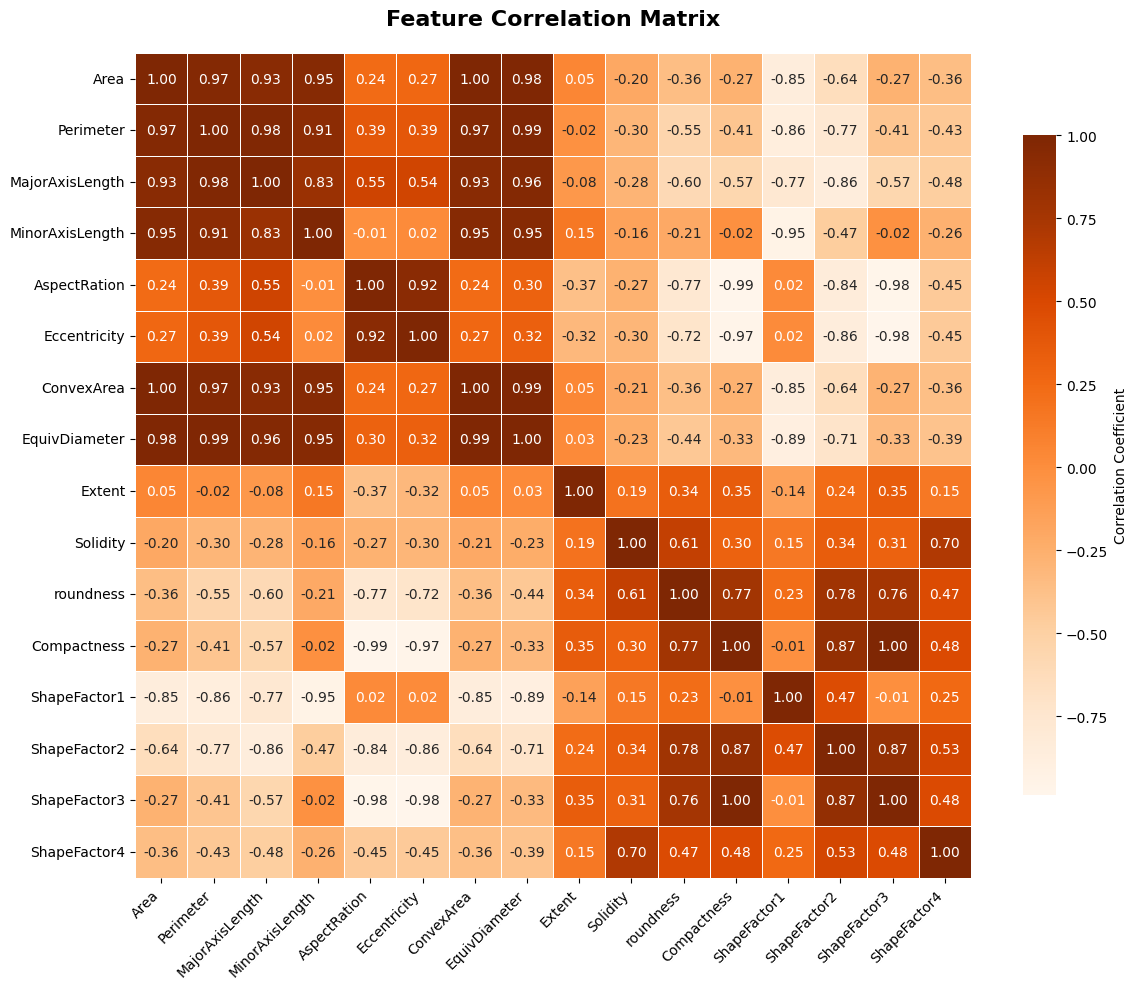

In [42]:
plt.figure(figsize=(12,10))
sns.heatmap(
    df.select_dtypes('number').corr(),
    annot=True,
    fmt=".2f",
    cmap='Oranges',
    linewidths=0.6,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}
)
plt.title('Feature Correlation Matrix', fontsize=16, weight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Visualizing shape factors through a bubble chart for comparing class distribution based on area and feature relationships.


In [43]:
fig = px.scatter(
    df,
    x='ShapeFactor1',
    y='ShapeFactor2',
    size='Area',
    color='Class',
    hover_name='Class',
    size_max=40,
    opacity=0.7,
    color_discrete_sequence=px.colors.qualitative.Bold,
    title='Bubble Chart: Shape Factors (Bubble Size = Area, Color = Class)'
)
fig.update_layout(
    title=dict(
        text='Bubble Chart: Shape Factors (Bubble Size = Area, Color = Class)',
        x=0.5,
        xanchor='center',
        font=dict(size=18, color='black')
    ),
    xaxis_title='ShapeFactor1',
    yaxis_title='ShapeFactor2',
    legend_title='Class',
    plot_bgcolor='white'
)
fig.show()

Identifying and summarizing outliers across numerical features using the IQR method for detecting data anomalies.


In [44]:
num_cols = df_cleaned.select_dtypes(include=['int64','float64']).columns
print("Outlier Analysis:")
outlier_summary = {}
for col in num_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df_cleaned[(df_cleaned[col] < lower) | (df_cleaned[col] > upper)]
    outlier_summary[col] = len(outliers)
outlier_df = pd.DataFrame(list(outlier_summary.items()), columns=['Column', 'Outlier_Count'])
outlier_df['Outlier_%'] = (outlier_df['Outlier_Count'] / len(df_cleaned) * 100).round(2)
outlier_df.sort_values(by='Outlier_%', ascending=False)

Outlier Analysis:


,Column,Outlier_Count,Outlier_%
5,Eccentricity,833,6.15
9,Solidity,774,5.72
15,ShapeFactor4,760,5.61
3,MinorAxisLength,567,4.19
0,Area,551,4.07
6,ConvexArea,549,4.05
12,ShapeFactor1,533,3.94
7,EquivDiameter,526,3.88
1,Perimeter,500,3.69
4,AspectRation,485,3.58


Applying MinMax scaling to normalize numerical features and examining their value distribution using boxplots.


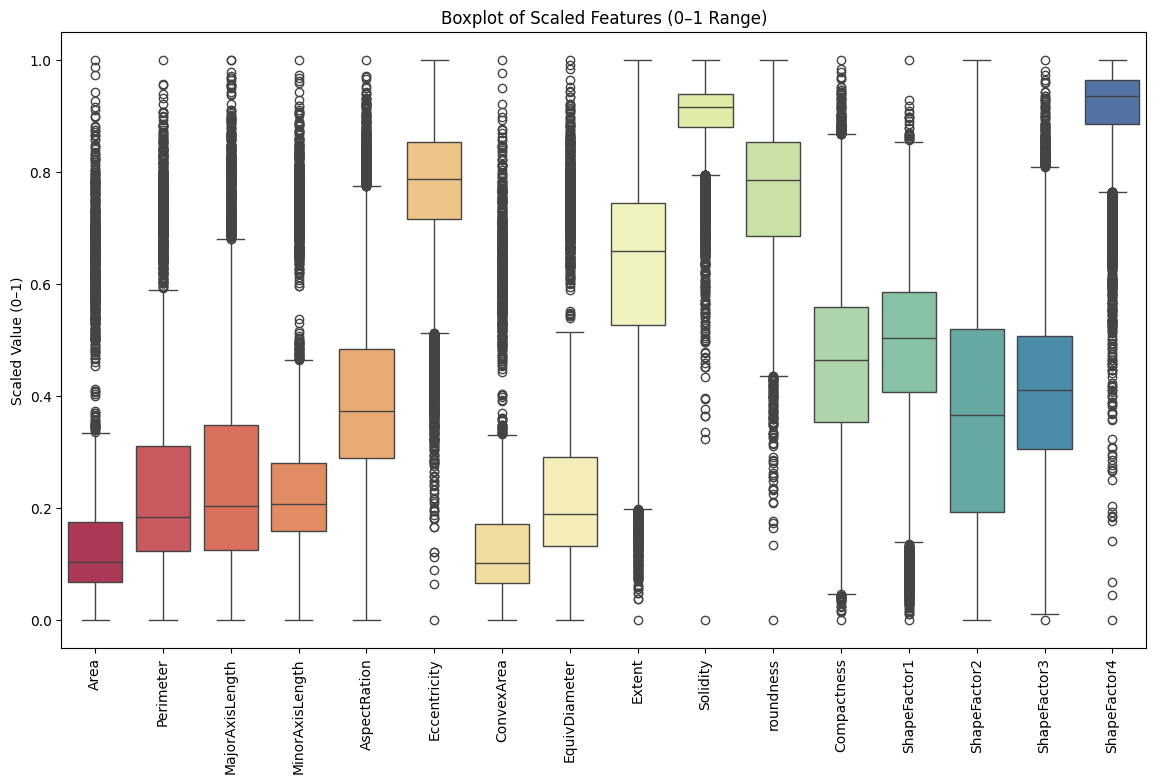

In [45]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned[num_cols]), columns=num_cols)

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_scaled, palette='Spectral')
plt.title('Boxplot of Scaled Features (0–1 Range)')
plt.xticks(rotation=90)
plt.ylabel('Scaled Value (0–1)')
plt.show()

Handling outliers by applying IQR-based capping to limit extreme values within defined boundaries.


In [46]:
df_capped = df_cleaned.copy()
for col in num_cols:
    Q1 = df_capped[col].quantile(0.25)
    Q3 = df_capped[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_capped[col] = np.where(df_capped[col] < lower, lower,
                              np.where(df_capped[col] > upper, upper, df_capped[col]))

Scaling the outlier-adjusted dataset using MinMax transformation and presenting feature distributions for uniform comparison.


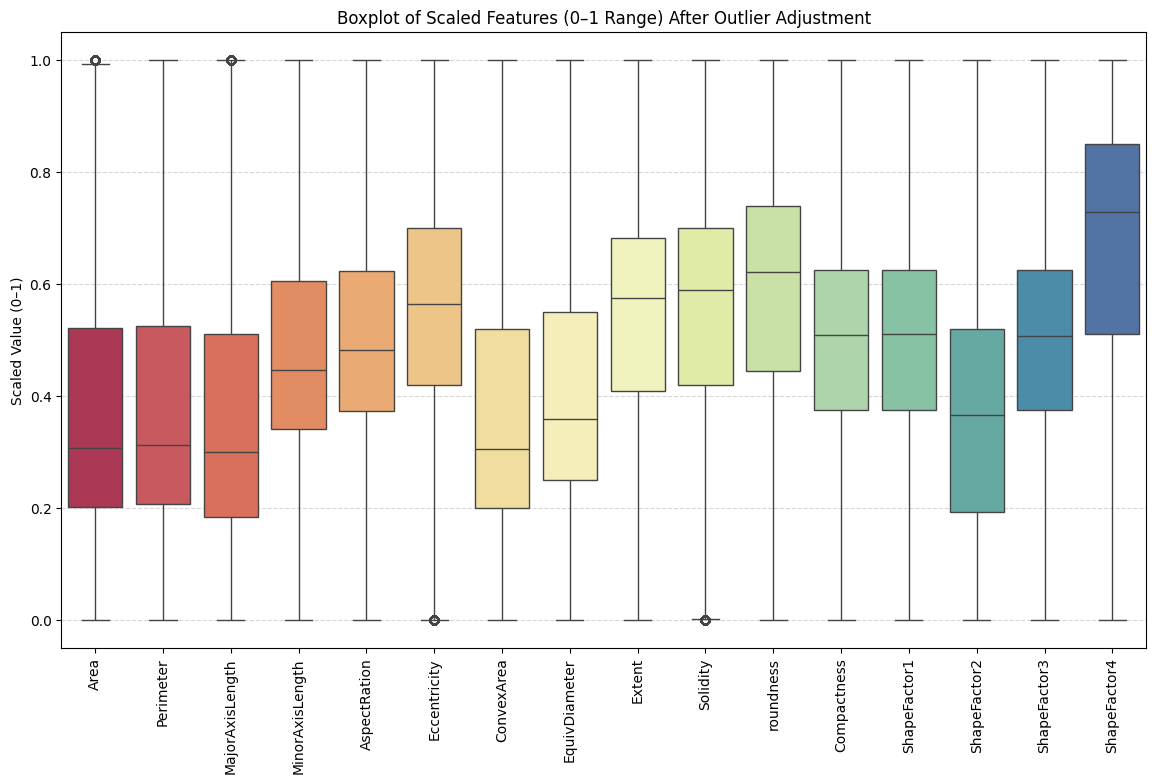

In [47]:
scaler = MinMaxScaler()
df_capped_scaled = pd.DataFrame(scaler.fit_transform(df_capped[num_cols]), columns=num_cols)

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_capped_scaled, palette='Spectral')
plt.title('Boxplot of Scaled Features (0–1 Range) After Outlier Adjustment')
plt.xticks(rotation=90)
plt.ylabel('Scaled Value (0–1)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

Encoding categorical class labels into numeric values for preparing data suitable for machine learning models.


In [48]:
le = LabelEncoder()
df_cleaned['Class_encoded'] = le.fit_transform(df_cleaned['Class'])
print("Class Mapping:")
for cls, val in zip(le.classes_, le.transform(le.classes_)):
    print(f"{cls} → {val}")

Class Mapping:
BARBUNYA → 0
BOMBAY → 1
CALI → 2
DERMASON → 3
HOROZ → 4
SEKER → 5
SIRA → 6


/tmp/ipython-input-3189941842.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Separating features and target, then splitting the dataset into training and testing, Applying scaling to normalize feature values to reduce influence of outliers.


In [49]:
X = df_cleaned.drop(columns=['Class', 'Class_encoded'])
y = df_cleaned['Class_encoded']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train shape: (10834, 16)
Test shape: (2709, 16)


Displaying the first few records of the scaled training dataset for confirming successful transformation.


In [51]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_scaled_df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,0.988589,1.010224,0.835107,0.787866,0.827298,0.662459,1.009234,0.912653,-0.767079,-2.539714,-1.439093,-0.794642,-0.653613,-0.597045,-0.769369,-2.734577
1,1.521599,1.350716,0.775813,1.899855,-0.379827,-0.440849,1.517924,1.336298,0.976188,-0.841758,-1.349293,0.387528,-1.395134,-0.316127,0.395545,-0.478214
2,0.812496,0.841222,0.998768,0.155981,2.057192,1.242119,0.801606,0.763826,0.350261,0.225769,-1.233578,-1.622446,-0.143110,-0.803996,-1.511208,-0.833900
3,-0.130867,-0.128076,-0.073961,-0.220466,0.063747,0.063584,-0.133267,-0.138396,0.475606,0.550559,0.214102,-0.051387,0.230239,0.040655,-0.051449,0.298007
4,1.848061,1.372931,1.325215,1.490156,0.956079,0.740648,1.814515,1.578951,0.433279,0.914990,-0.542044,-0.847392,-1.165719,-0.747635,-0.818457,-0.494256


Training the K-Nearest Neighbors classifier and generating predictions on the scaled test dataset.


In [52]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn, target_names=le.classes_))
print("Accuracy:", round(accuracy_score(y_test, y_pred_knn), 4))

KNN Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.93      0.89      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.91      0.94      0.92       326
    DERMASON       0.90      0.91      0.91       709
       HOROZ       0.96      0.94      0.95       372
       SEKER       0.95      0.93      0.94       406
        SIRA       0.85      0.85      0.85       527

    accuracy                           0.91      2709
   macro avg       0.93      0.92      0.93      2709
weighted avg       0.91      0.91      0.91      2709

Accuracy: 0.9121


Evaluating KNN model performance using classification metrics and confusion matrix to assess prediction accuracy.


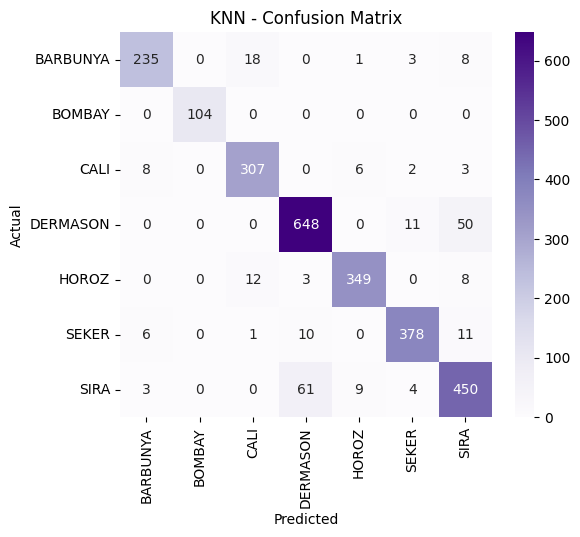

In [53]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='d', cmap='Purples',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("KNN - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

SVTraining the Support Vector Machine classifier using RBF kernel for generating predictions and evaluation metrics.


In [54]:
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))
print("Accuracy:", round(accuracy_score(y_test, y_pred_svm), 4))

SVM Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.94      0.89      0.91       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.93      0.95      0.94       326
    DERMASON       0.92      0.91      0.91       709
       HOROZ       0.96      0.95      0.96       372
       SEKER       0.94      0.95      0.94       406
        SIRA       0.86      0.88      0.87       527

    accuracy                           0.92      2709
   macro avg       0.93      0.93      0.93      2709
weighted avg       0.92      0.92      0.92      2709

Accuracy: 0.9214


Assessing SVM model performance through and confusion matrix to measure predictive effectiveness.


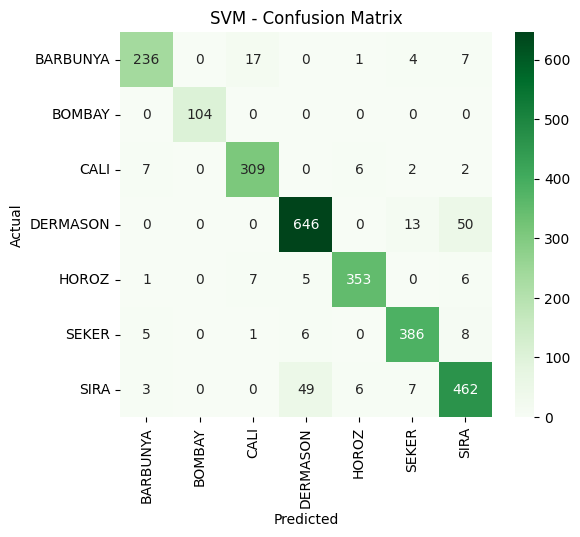

In [55]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Building a Decision Tree classifier for learning feature patterns and predicting class labels and evaluation metrics.


In [56]:
dt = DecisionTreeClassifier(max_depth=None, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=le.classes_))
print("Accuracy:", round(accuracy_score(y_test, y_pred_dt), 4))

Decision Tree Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.88      0.90      0.89       265
      BOMBAY       1.00      1.00      1.00       104
        CALI       0.91      0.91      0.91       326
    DERMASON       0.89      0.91      0.90       709
       HOROZ       0.95      0.92      0.94       372
       SEKER       0.91      0.94      0.92       406
        SIRA       0.84      0.81      0.82       527

    accuracy                           0.90      2709
   macro avg       0.91      0.91      0.91      2709
weighted avg       0.90      0.90      0.90      2709

Accuracy: 0.8966


Evaluating Decision Tree model accuracy and generating confusion matrix to interpret classification performance.


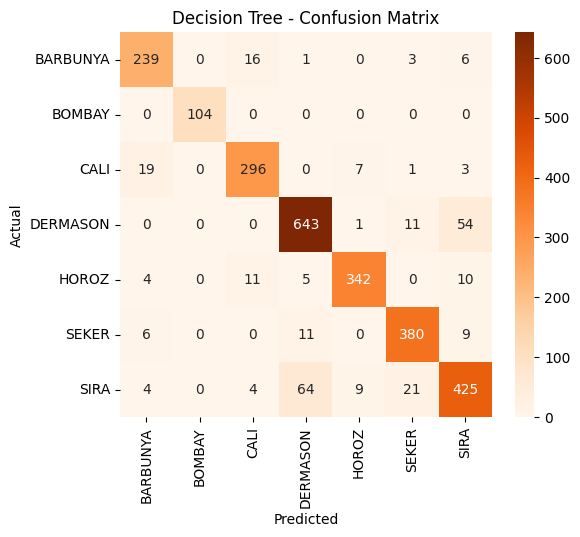

In [57]:
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Oranges',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Comparing multiple classification models based on accuracy, precision, recall, and F1-score to identify the most efficient performer.


In [63]:
models = ['KNN', 'SVM', 'Decision Tree']
y_preds = [y_pred_knn, y_pred_svm, y_pred_dt]
data = []
for model, y_pred in zip(models, y_preds):
    data.append({
        'Model': model,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    })
comparison_df = pd.DataFrame(data).round(4)
print("Model Performance Summary:\n")
display(comparison_df.style
        .set_table_styles([
            {'selector': 'th', 'props': [('font-weight', 'bold'), ('text-align', 'center')]},
            {'selector': 'td', 'props': [('text-align', 'center')]}
        ])
        .set_caption("Performance Comparison of Classification Models)")
        .format(precision=4))

Model Performance Summary:



,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,0.9121,0.9126,0.9121,0.9122
1,SVM,0.9214,0.9217,0.9214,0.9214
2,Decision Tree,0.8966,0.8965,0.8966,0.8964


Comparing model accuracies to determine the best-performing algorithm based on overall predictive performance.


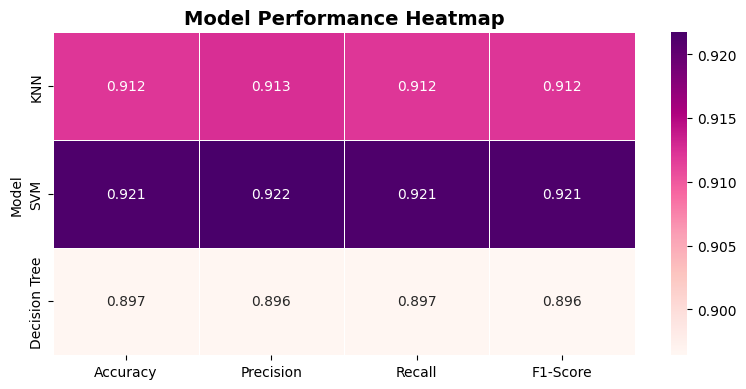

In [64]:
models = ['KNN', 'SVM', 'Decision Tree']
y_preds = [y_pred_knn, y_pred_svm, y_pred_dt]
data = []
for model, y_pred in zip(models, y_preds):
    data.append({
        'Model': model,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    })
df = pd.DataFrame(data).set_index('Model')
df = df.round(4)
plt.figure(figsize=(8, 4))
sns.heatmap(df, annot=True, cmap='RdPu', cbar=True, fmt=".3f", linewidths=0.5)
plt.title('Model Performance Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

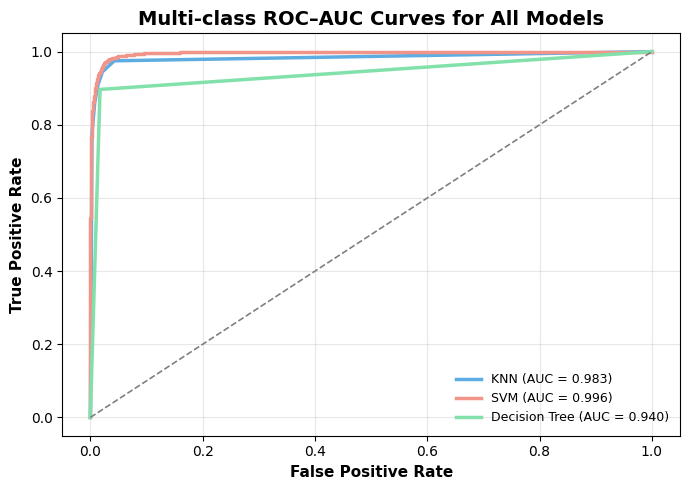

In [62]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]
models_dict = {
    "KNN": knn,
    "SVM": svm,
    "Decision Tree": dt,
}
colors = ['#5DADE2', '#F1948A', '#82E0AA', '#AF7AC5']
plt.figure(figsize=(7, 5))
for (model_name, model), color in zip(models_dict.items(), colors):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)
    else:
        y_score = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=color, lw=2.5, label=f"{model_name} (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color='gray', lw=1.2, linestyle='--')
plt.title('Multi-class ROC–AUC Curves for All Models', fontsize=14, fontweight='bold')
plt.xlabel('False Positive Rate', fontsize=11, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=11, fontweight='bold')
plt.legend(loc="lower right", fontsize=9, frameon=False)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()